# Prediction of Obesity Risk - Processing

## Problem Statement

## Data Dictionary

# Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sb
# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')
plt.rcParams['axes.spines.top'] = False    # Remove top border
plt.rcParams['axes.spines.right'] = False  # Remove right border



# Load Data

In [2]:
data = pd.read_csv('../Data/Raw/train.csv')
print(f'Dataset has {data.shape[0]} rows and {data.shape[1]} columns')

Dataset has 20758 rows and 18 columns


In [3]:
# Creating a copy of the dataset in memory in case of misediting
df = data.copy()

# Data Preperation

In [4]:
df.drop('id', axis=1, inplace=True)

In [15]:
df['NCP'] = df['NCP'].round()

In [17]:
df['NCP'].value_counts()

3.000    16309
1.000     2510
4.000     1040
2.000      899
Name: NCP, dtype: int64

In [26]:
df.to_csv('../Data/Processed/processed_with_outliers.csv', index=False)

In [19]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)
        
print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 9 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numeric columns: 8 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


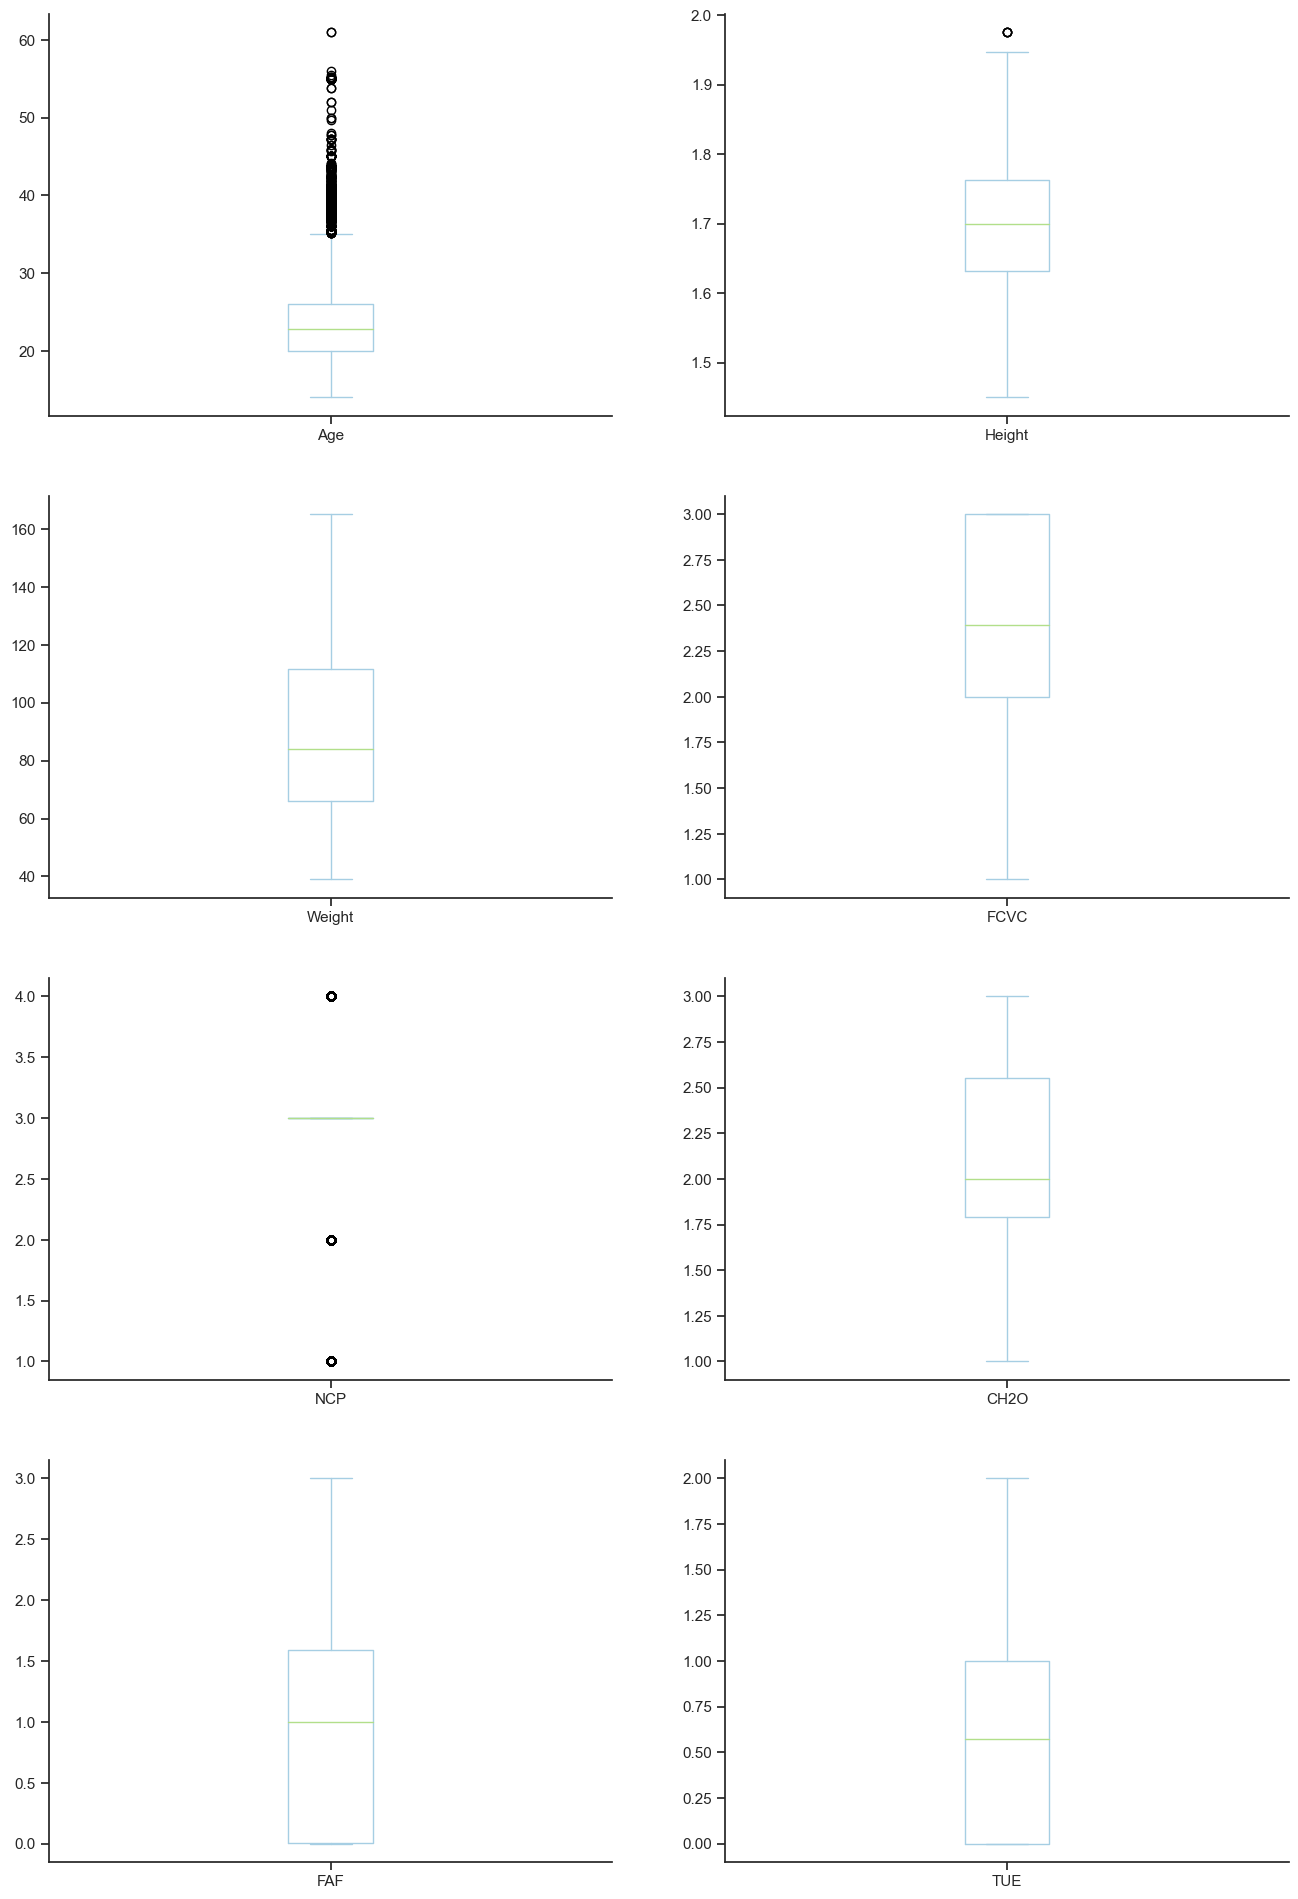

In [22]:
df[num_cols].plot(
    kind='box',
    subplots=True, 
    layout=(4,2), 
    sharex=False, 
    legend=True, 
    figsize=(16,24)
    )
plt.show()

In [24]:
df_no_outliers = df[df['Age'] <= 35]
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19684 entries, 0 to 19683
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          19684 non-null  object 
 1   Age                             19684 non-null  float64
 2   Height                          19684 non-null  float64
 3   Weight                          19684 non-null  float64
 4   family_history_with_overweight  19684 non-null  object 
 5   FAVC                            19684 non-null  object 
 6   FCVC                            19684 non-null  float64
 7   NCP                             19684 non-null  float64
 8   CAEC                            19684 non-null  object 
 9   SMOKE                           19684 non-null  object 
 10  CH2O                            19684 non-null  float64
 11  SCC                             19684 non-null  object 
 12  FAF                             

In [27]:
df_no_outliers.to_csv('../Data/Processed/processed_no_outliers.csv', index=False)

# Next Steps

- Modelling